In [1]:
#Use this window to import packages you will use later
#When you first start working or import a new package, this cell needs to be run before doing anything else.

import numpy as np

import pylab

import matplotlib
import matplotlib.gridspec as gridspec

import scipy

import astropy.io.fits as fits
from astropy.wcs import WCS
from astropy import units as u
from astropy.stats import sigma_clip
import matplotlib.pyplot as plt

import regions

import pyspeckit as psk

from spectral_cube import SpectralCube

from reproject import reproject_interp
from reproject.mosaicking import find_optimal_celestial_wcs 

# Suppress warnings we don't care about:
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
# Embeds plots in the Jupyter window 
%matplotlib inline                             

matplotlib.rc('text', usetex=True)
#matplotlib.rc('font', family='sans-serif')
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)

datadir = "../data/"
linedir = datadir + "3channel_masked_high_resolution/line_masked/"
lores_linedire = datadir + "3_line_masked/"

filenames = {
    'arII': 'NGC253_ArII_7.0.line_smooth_regrid_maskch1.fits',
    'arIII': 'NGC253_ArIII_9.0.line_smooth_regrid_maskch1.fits',
    'c2h2': 'NGC253_C2H2_13.7.line_smooth_regrid_maskch1.fits',
    'clII': 'NGC253_ClII_14.4.line_smooth_regrid_maskch1.fits',
    'co2': 'NGC253_CO2_15.0.line_smooth_regrid_maskch1.fits',
    'feII_5.3': 'NGC253_FeII_5.3.line_smooth_regrid_maskch1.fits',
    'h5a': 'NGC253_H5a_7.5.line_smooth_regrid_maskch1.fits',
    'h5b': 'NGC253_H5b_7.5.line_smooth_regrid_maskch1.fits',
    'h6a': 'NGC253_H6a_12.4.line_smooth_regrid_maskch1.fits',
    'h6d': 'NGC253_H6d_5.1.line_smooth_regrid_maskch1.fits',
    'h6g': 'NGC253_H6g_5.9.line_smooth_regrid_maskch1.fits',
    'h7b' 'NGC253_H7b_11.3.line_smooth_regrid_maskch1.fits',
    'h7d': 'NGC253_H7d_7.5.line_smooth_regrid_maskch1.fits',
    'h7e_6.0': 'NGC253_H7e_6.0.line_smooth_regrid_maskch1.fits',
    'h7e_6.8': 'NGC253_H7e_6.8.line_smooth_regrid_maskch1.fits',
    'h7g': 'NGC253_H7g_8.8.line_smooth_regrid_maskch1.fits',
    'h7i': 'NGC253_H7i_5.5.line_smooth_regrid_maskch1.fits',
    'h7k': 'NGC253_H7k_5.4.line_smooth_regrid_maskch1.fits',
    'h7t': 'NGC253_H7t_5.7.line_smooth_regrid_maskch1.fits',
    'h7z': 'NGC253_H7z_6.3.line_smooth_regrid_maskch1.fits',
    'h8b': 'NGC253_H8b_16.2.line_smooth_regrid_maskch1.fits',
    'h8g': 'NGC253_H8g_12.4.line_smooth_regrid_maskch1.fits',
    'h8t': 'NGC253_H8t_7.8.line_smooth_regrid_maskch1.fits',
    'hcn': 'NGC253_HCN_14.0.line_smooth_regrid_maskch1.fits',
    'he': 'NGC253_He_6.7.line_smooth_regrid_maskch1.fits',
    'mgV_13.5': 'NGC253_MgV_13.5.line_smooth_regrid_maskch1.fits',
    'mgV_5.6': 'NGC253_MgV_5.6.line_smooth_regrid_maskch1.fits',
    'neII': 'NGC253_NeII_12.8.line_smooth_regrid_maskch1.fits',
    'neIII': 'NGC253_NeIII_15.6.line_smooth_regrid_maskch1.fits',
    'neV': 'NGC253_NeV_14.3.line_smooth_regrid_maskch1.fits',
    'neVI': 'NGC253_NeVI_7.7.line_smooth_regrid_maskch1.fits',
    'niII_10.7': 'NGC253_NiII_10.7.line_smooth_regrid_maskch1.fits',
    'niII_6.6': 'NGC253_NiII_6.6.line_smooth_regrid_maskch1.fits',
    'niIII': 'NGC253_NiIII_7.3.line_smooth_regrid_maskch1.fits',
    'pIII': 'NGC253_PIII_17.9.line_smooth_regrid_maskch1.fits',
    's1': 'NGC253_S1_17.0.line_smooth_regrid_maskch1.fits',
    's2': 'NGC253_S2_12.3.line_smooth_regrid_maskch1.fits',
    's3': 'NGC253_S3_9.7.line_smooth_regrid_maskch1.fits',
    's4': 'NGC253_S4_8.0.line_smooth_regrid_maskch1.fits',
    's5': 'NGC253_S5_6.9.line_smooth_regrid_maskch1.fits',
    's6': 'NGC253_S6_6.1.line_smooth_regrid_maskch1.fits',
    's7_1': 'NGC253_S7_1-1_5.8.line_smooth_regrid_maskch1.fits',
    's7_5': 'NGC253_S7_5.5.line_smooth_regrid_maskch1.fits',
    's8': 'NGC253_S8_5.1.line_smooth_regrid_maskch1.fits',
    's9': 'NGC253_S9_5.0.line_smooth_regrid_maskch1.fits',
    'sIV_10.5': 'NGC253_SIV_10.5.line_smooth_regrid_maskch1.fits',
    'u5_5.65': 'NGC253_U_5.65_5.7.line_smooth_regrid_maskch1.fits',
    'u5_5.74': 'NGC253_U_5.74_5.7.line_smooth_regrid_maskch1.fits',
    'u1': 'NGC253_U1_6.1.line_smooth_regrid_maskch1.fits',
    'u10': 'NGC253_U10_10.9.line_smooth_regrid_maskch1.fits'

}
#'NGC253_sky_v1_17_1_ch1-shortmediumlong_s3d_smooth.regrid-ch4.mask.fits',
#'NGC253_sky_v1_17_1_ch2-shortmediumlong_s3d_smooth.regrid-ch4.mask.fits',
#'NGC253_sky_v1_17_1_ch3-shortmediumlong_s3d_smooth.regrid-ch4.mask.fits',
#'NGC253_sky_v1_17_1_ch4-shortmediumlong_s3d_smooth.mask.fits'


#print("all imported")

In [8]:
def calculate_ratio_map(fnstrone, fnstrtwo, annotation='', lab='', clrmap='copper', snrlim=5, clipping=True):
    """
    Generates a ratio map for two given line fluxes
    :param fnstrone: The filename string for the top line in the ratio. Use the filenames dictionary to make this easier
    :param fnstrtwo: The filename string for the bottom line in the ratio
    :param lab: The label with the tex-formatted ratio to go on the plot
    :param clrmap: Colormap to use for plot
    :param snrlim: SNR cut to use for masking
    :param clipping: Whether or not to include an SNR mask (this should always be true except for debugging)
    :return: None, makes a plot
    """
    
    # Extract moment maps and calculate ratios for selected line fluxes
    ione = SpectralCube.read(linedir + fnstrone)    
    #print(ione)                                              
    
    itwo = SpectralCube.read(linedir + fnstrtwo)
    #print(itwo)
    
    # These are the same size and shape
    
    ione_kms = ione.with_spectral_unit(u.km/u.s, velocity_convention="optical")
    ione_kms.allow_huge_operations = True
    ione_K_kms = ione_kms.to(u.K)  # Converts to Kelvin for the units
    itwo_kms = itwo.with_spectral_unit(u.km/u.s, velocity_convention="optical")
    itwo_kms.allow_huge_operations = True
    itwo_K_kms = itwo_kms.to(u.K)
    
    # Calculate Moment 0 maps
    ione_moment0  = ione_K_kms.moment(order=0, how='slice')
    itwo_moment0  = itwo_K_kms.moment(order=0, how='slice')
    
    # The below reprojection should not be necessary since the two moment maps are same size and shape, but maybe we want to include it for redundancy when generalizing this code?
    ione_moment0_reproject, footprint = reproject_interp(ione_moment0.hdu,itwo_moment0.header)
    
    # Compute ratio maps
    ratio_ione_itwo = ione_moment0_reproject/itwo_moment0.hdu.data
    
    # Not sure what kind of mask we want to use here, if any
    #badpix = pylab.where(ione_moment0.hdu.data<10)     # Identify emission below a threshold to mask
    #badpix2 = pylab.where(itwo_moment0.hdu.data<0)     # Mask absorption
    #ratio_NIII_NII[badpix] = np.nan                        # Mask the ratio map
    #ratio_NIII_NII[badpix2] = np.nan

    if clipping:
        # Attempt to remove low-snr pixels
        clipped = sigma_clip(ratio_ione_itwo, sigma=snrlim, masked=True)
        ratio_ione_itwo = clipped.filled(np.nan)     # replace masked pixels with NaN
        
    plt.close('all')
    
    fig = plt.figure(figsize=(5, 5), dpi=150) # <-------------- Change the fig size to make it bigger/smaller
    ax = fig.add_subplot(1, 1, 1, projection=itwo_moment0.wcs)
    
    # Plot the ratio map
    im = ax.imshow(ratio_ione_itwo, cmap=clrmap, origin='lower')
    
    # Axes labels and ticks
    RA = ax.coords[0]
    Dec = ax.coords[1]
    RA.set_ticks(size=-3)
    Dec.set_ticks(size=-3)
    ax.set_xlabel('Right Ascension', fontsize=20, labelpad=1)
    ax.set_ylabel('Declination', fontsize=20, labelpad=0)
    ax.tick_params(axis='both', which='major', labelsize=10)
    
    # Colorbar on the right
    cb = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cb.set_label(label=lab, fontsize=20, rotation=270, labelpad=20)
    cb.ax.tick_params(which='major', labelsize=10)
    
    # Annotation
    plt.annotate(text=annotation, fontsize=32, xy=(0.03, 0.04), xycoords="axes fraction")
    
    # Fill the space
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    
    plt.show()

# Ratio maps

Copper map is for field hardness diagnostics<br>
Viridis is for ionization<br>
Plasma is for high-energy photons

Hardness diagnostic

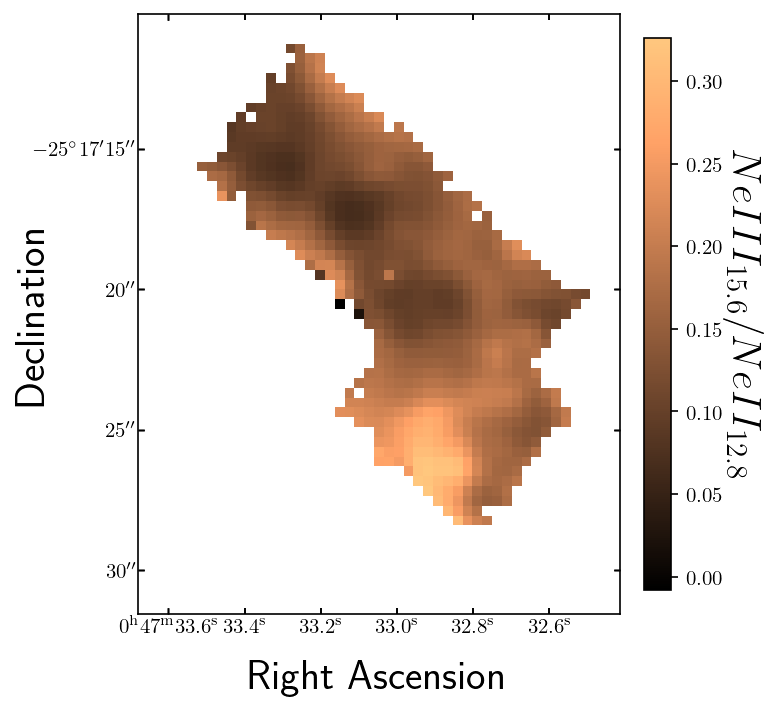

In [9]:
calculate_ratio_map(filenames['ne3'], filenames['ne2'], lab=r'$NeIII_{15.6}/NeII_{12.8}$', clrmap='copper')
#calculate_ratio_map(filenames['ne3'], filenames['ne2'], lab=r'$NeIII_{15.6}/NeII_{12.8}$', clrmap='copper', clipping=False)

Hardness diagnostic, sensitive to metallicity

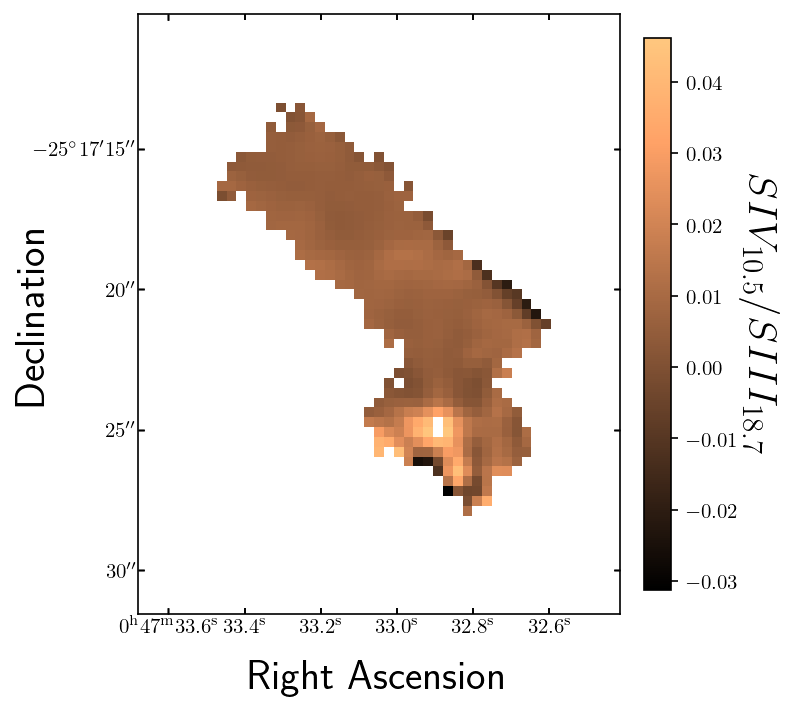

In [10]:
calculate_ratio_map(filenames['s4'], filenames['s3'], lab=r'$SIV_{10.5}/SIII_{18.7}$', clrmap='copper')
#calculate_ratio_map(filenames['s4'], filenames['s3'], lab=r'$SIV_{15.6}/SIII_{18.7}$', clrmap='copper', clipping=False)

Intermediate ionization

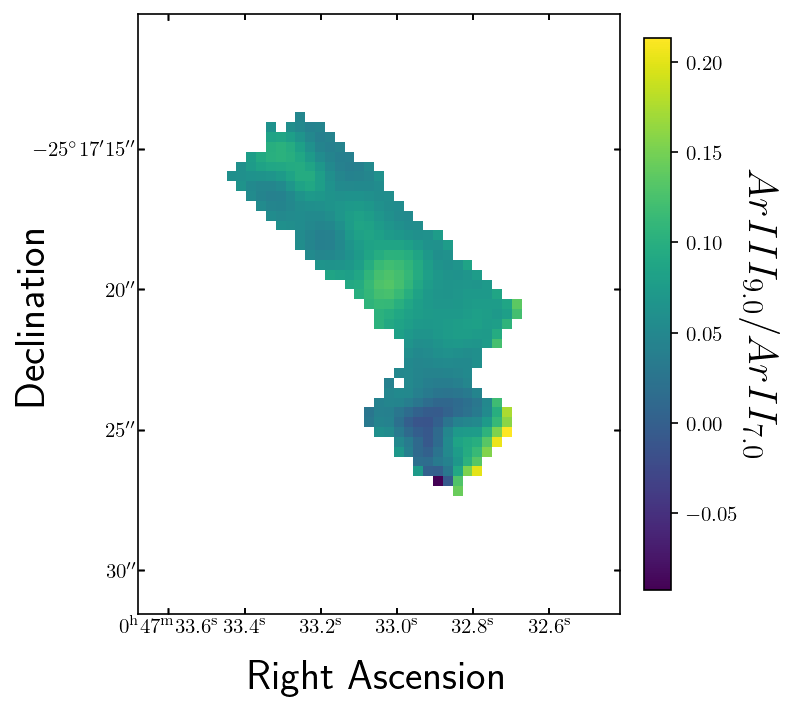

In [11]:
calculate_ratio_map(filenames['ar3'], filenames['ar2'], lab=r'$ArIII_{9.0}/ArII_{7.0}$', clrmap='viridis')
#calculate_ratio_map(filenames['ar3'], filenames['ar2'], lab=r'$ArIII_{9.0}/ArII_{7.0}$', clrmap='viridis', clipping=False)

Shocks vs photoionization

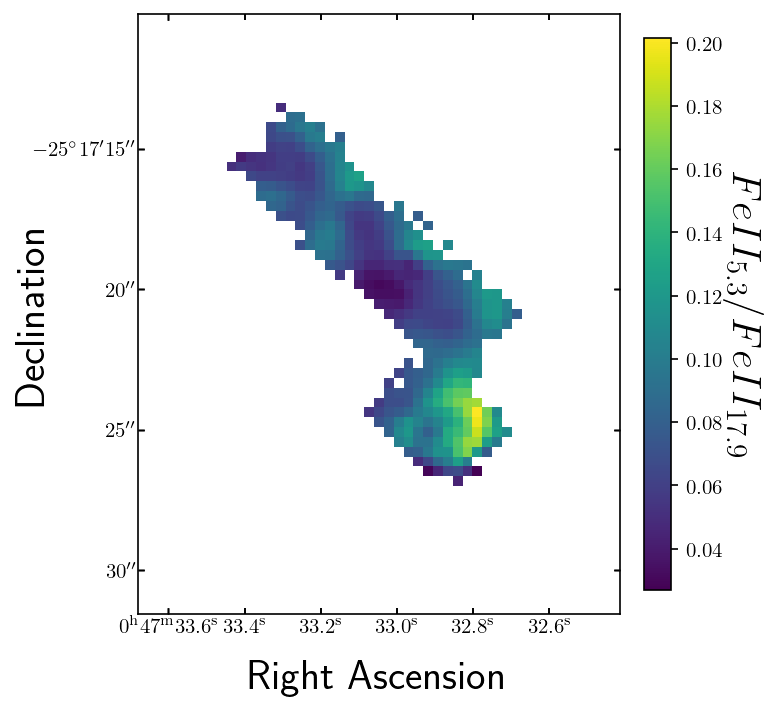

In [50]:
calculate_ratio_map(filenames['fe2_5.3'], filenames['fe2_17.9'], lab=r'$FeII_{5.3}/FeII_{17.9}$', clrmap='viridis')
#calculate_ratio_map(filenames['fe2_5.3'], filenames['fe2_17.9'], lab=r'$FeII_{5.3}/FeII_{17.9}$', clrmap='viridis', clipping=False)

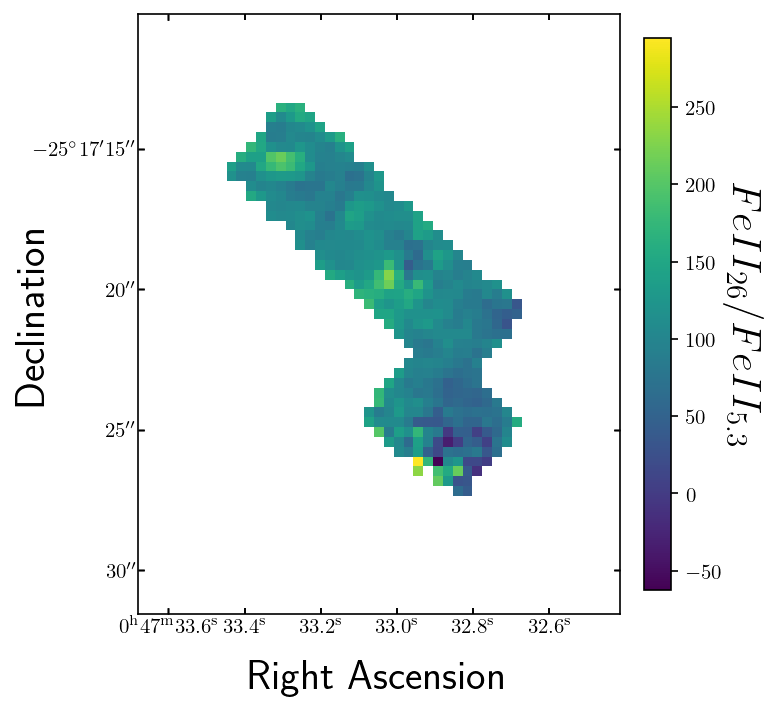

In [44]:
# This is where I was trying the different combinations of FeII 26
calculate_ratio_map(filenames['fe2_26'], filenames['fe2_5.3'], lab=r'$FeII_{26}/FeII_{5.3}$', clrmap='viridis')
#calculate_ratio_map(filenames['fe2_5.3'], filenames['fe2_17.9'], lab=r'$FeII_{5.3}/FeII_{17.9}$', clrmap='viridis', clipping=False)

High energy photons (>54.9 eV)

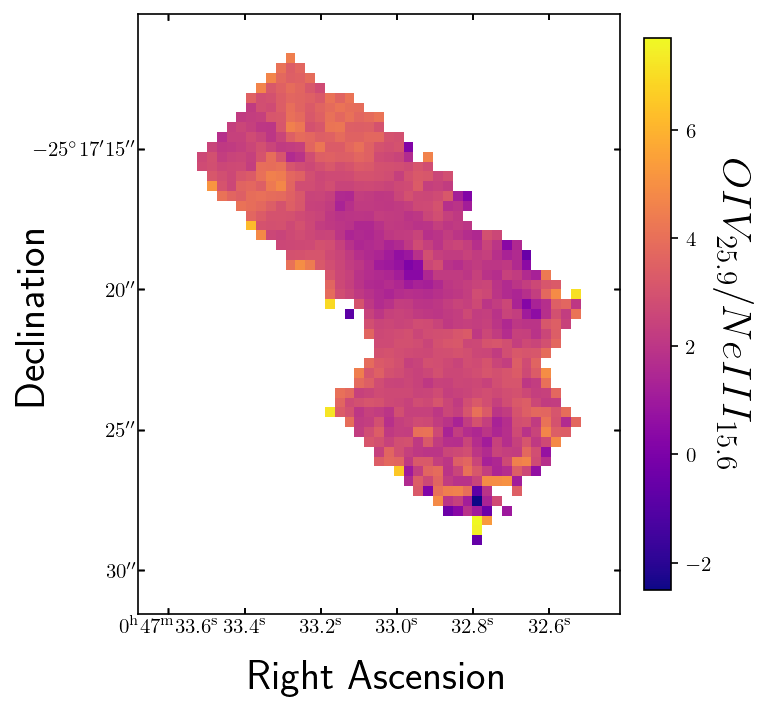

In [45]:
calculate_ratio_map(filenames['o4'], filenames['ne3'], lab=r'$OIV_{25.9}/NeIII_{15.6}$', clrmap='plasma')
#calculate_ratio_map(filenames['o4'], filenames['ne3'], lab=r'$OIV_{25.9}/NeIII_{15.6}$', clrmap='plasma', clipping=False)

Possible probe of effective temperature for stars (?) that ionize HII region

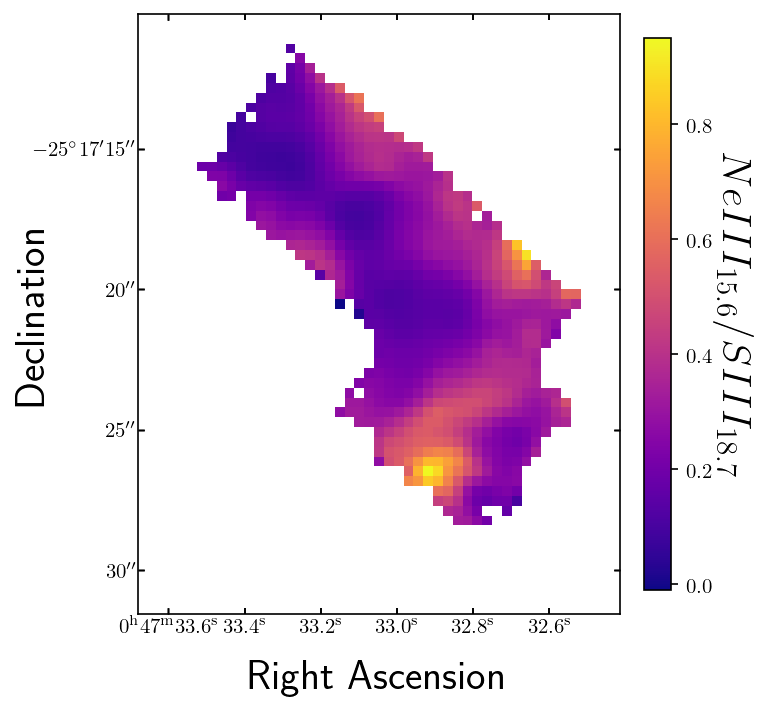

In [47]:
calculate_ratio_map(filenames['ne3'], filenames['s3'], lab=r'$NeIII_{15.6}/SIII_{18.7}$', clrmap='plasma')
#calculate_ratio_map(filenames['ne3'], filenames['s3'], lab=r'$NeIII_{15.6}/SIII_{18.7}$', clrmap='plasma', clipping=False)

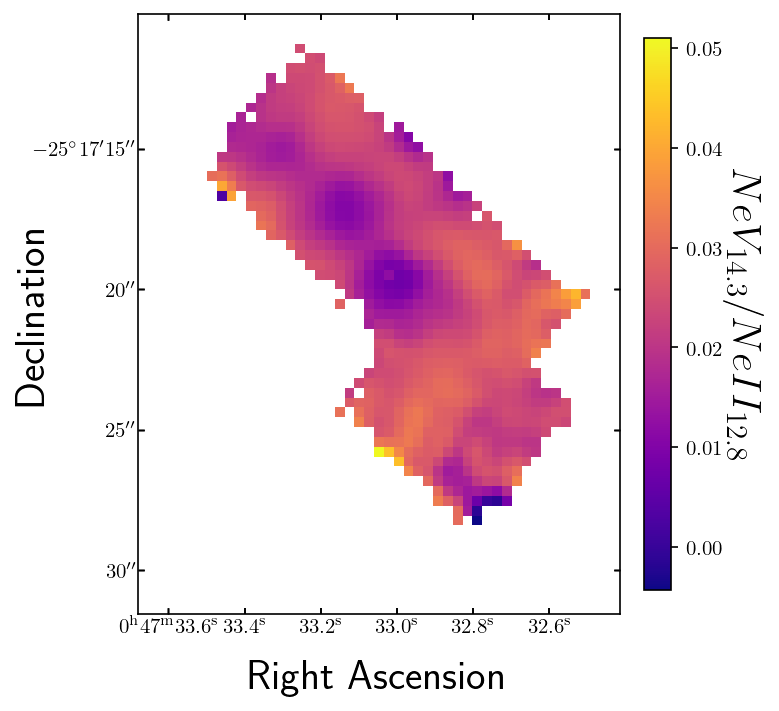

In [48]:
calculate_ratio_map(filenames['ne5'], filenames['ne2'], lab=r'$NeV_{14.3}/NeII_{12.8}$', clrmap='plasma')
#calculate_ratio_map(filenames['ne3'], filenames['s3'], lab=r'$NeIII_{15.6}/SIII_{18.7}$', clrmap='plasma', clipping=False)